In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_deaths.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)  # visualization tool


from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.display import IFrame
IFrame('https://www.myheatmap.com/maps/PPk1_rfT1jQ%3D', width=800, height=600)

<br><h2>**What is Coronavirus</h2>**</br>
2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.

The data is available from 22 Jan 2020.

<br><h2>**Define the Problem**</h2></br>
Coronaviruses are a large family of viruses that are common in many different species of animals, including camels, cattle, cats, and bats. Rarely, animal coronaviruses can infect people and then spread between people such as with MERS, SARS, and now with 2019-nCoV.

Outbreaks of novel virus infections among people are always of public health concern. The risk from these outbreaks depends on characteristics of the virus, including whether and how well it spreads between people, the severity of resulting illness, and the medical or other measures available to control the impact of the virus (for example, vaccine or treatment medications).

This is a very serious public health threat. The fact that this virus has caused severe illness and sustained person-to-person spread in China is concerning, but it’s unclear how the situation in the United States will unfold at this time.

The risk to individuals is dependent on exposure. At this time, some people will have an increased risk of infection, for example healthcare workers caring for 2019-nCoV patients and other close contacts. For the general American public, who are unlikely to be exposed to this virus, the immediate health risk from 2019-nCoV is considered low. The goal of the ongoing U.S. public health response is to prevent sustained spread of 2019-nCov in this country.

<br><h2>**Precautions**</h2></br>
Health authorities and scientists say the same precautions against other viral illnesses can be used: wash your hands frequently, cover up your coughs, try not to touch your face.
And anyone who does come down with the virus should be placed in isolation.
"Considering that substantial numbers of patients with SARS and MERS were infected in health-care settings", precautions need to be taken to prevent that happening again, the Chinese team warned in The Lancet.

<h1>If you like my work Kindly **upvote** the kernel!!</h1>

In [4]:
data= pd.read_csv("../input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv")

In [5]:
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
Sno               1199 non-null int64
Date              1199 non-null object
Province/State    888 non-null object
Country           1199 non-null object
Last Update       1199 non-null object
Confirmed         1199 non-null float64
Deaths            1199 non-null float64
Recovered         1199 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 75.1+ KB


In [7]:
data.shape

(1199, 8)

In [8]:
data.describe()

,Sno,Confirmed,Deaths,Recovered
count,1199.000000,1199.000000,1199.000000,1199.000000
mean,600.000000,276.213511,5.961635,14.617181
std,346.265794,1966.264622,58.082724,103.959136
min,1.000000,0.000000,0.000000,0.000000
25%,300.500000,2.000000,0.000000,0.000000
50%,600.000000,10.000000,0.000000,0.000000
75%,899.500000,82.000000,0.000000,2.000000
max,1199.000000,31728.000000,974.000000,2222.000000


In [9]:
data.isnull().sum()

Sno                 0
Date                0
Province/State    311
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

In [10]:
#this shows we have empty values in province/state field

In [11]:
#data[['Confirmed', 'Deaths', 'Recovered']].sum()

In [12]:
# Let's get rid of the Sno column as it's redundant
data.drop(['Sno'], axis=1, inplace=True)

In [13]:
data.drop('Last Update', axis=1, inplace=True)

In [14]:
data.tail()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
1194,02/10/2020 19:30:00,"Los Angeles, CA",US,1.0,0.0,0.0
1195,02/10/2020 19:30:00,"Madison, WI",US,1.0,0.0,0.0
1196,02/10/2020 19:30:00,"Orange, CA",US,1.0,0.0,0.0
1197,02/10/2020 19:30:00,"Seattle, WA",US,1.0,0.0,1.0
1198,02/10/2020 19:30:00,"Tempe, AZ",US,1.0,0.0,0.0


In [15]:
data['Province/State'].value_counts()

Macau                           20
Hebei                           20
Ningxia                         20
Hunan                           20
Shanxi                          20
Jilin                           20
Heilongjiang                    20
Liaoning                        20
Hubei                           20
Inner Mongolia                  20
Qinghai                         20
Anhui                           20
Beijing                         20
Gansu                           20
Guangxi                         20
Yunnan                          20
Jiangsu                         20
Shandong                        20
Taiwan                          20
Jiangxi                         20
Hong Kong                       20
Tianjin                         20
Chongqing                       20
Henan                           20
Shanghai                        20
Shaanxi                         20
Xinjiang                        20
Guizhou                         20
Guangdong           

<h1>**Implementing Data Exploration**</h1>

In [16]:
# Countries affected

countries = data['Country'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium', 'Others']

Total countries affected by virus:  33


In [17]:
#Combining China and Mainland China cases

data['Country'].replace({'Mainland China':'China'},inplace=True)
countries = data['Country'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium', 'Others']

Total countries affected by virus:  32


<h2>**Latest_Data_On_nCoV Virus**</h2>

In [18]:
#latest_nCoV_data = data[data['Date'] > pd.Timestamp(date(year,month,day))]
# Data Glimpse
latest_nCoV_data.tail()

NameError: name 'latest_nCoV_data' is not defined

In [19]:
# Getting the latest numbers

#formatted_text('***Latest Numbers Globaly***')
print('Confirmed Cases around the globe : ',latest_nCoV_data['Confirmed'].sum())
print('Deaths Confirmed around the globe: ',latest_nCoV_data['Deaths'].sum())
print('Recovered Cases around the globe : ',latest_nCoV_data['Recovered'].sum())

NameError: name 'latest_nCoV_data' is not defined

In [20]:
tempState = data['Province/State'].mode()
print(tempState)
#df['Province/State'].fillna(tempState, inplace=True)

0              Anhui
1            Beijing
2          Chongqing
3             Fujian
4              Gansu
5          Guangdong
6            Guangxi
7            Guizhou
8             Hainan
9              Hebei
10      Heilongjiang
11             Henan
12         Hong Kong
13             Hubei
14             Hunan
15    Inner Mongolia
16           Jiangsu
17           Jiangxi
18             Jilin
19          Liaoning
20             Macau
21           Ningxia
22           Qinghai
23           Shaanxi
24          Shandong
25          Shanghai
26            Shanxi
27           Sichuan
28            Taiwan
29           Tianjin
30          Xinjiang
31            Yunnan
32          Zhejiang
dtype: object


**Converting
<br>Convert the Date Time stamp to Date</br>
**


In [21]:
from datetime import datetime
# 1/22/2020 12:00
# 1/26/2020 23:00
# 1/23/20 12:00 PM
# 2020-01-02 23:33:00
# 
def try_parsing_date_time(text):
    for fmt in ('%Y-%m-%d', '%d.%m.%Y', '%m/%d/%Y %h:%m', '%m/%d/%Y %H:%M','%m/%d/%Y %H:%M:%S','%m/%d/%y %I:%M %p', '%m/%d/%Y %I:%M %p', '%Y-%d-%m %H:%M:%S'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date time format found', text)


def try_parsing_date(text):
    for fmt in ('%m/%d/%Y', '%m/%d/%y', '%Y-%d-%m', '%d.%m.%Y'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found', text)

In [22]:
data['Date']

0       01/22/2020 12:00:00
1       01/22/2020 12:00:00
2       01/22/2020 12:00:00
3       01/22/2020 12:00:00
4       01/22/2020 12:00:00
               ...         
1194    02/10/2020 19:30:00
1195    02/10/2020 19:30:00
1196    02/10/2020 19:30:00
1197    02/10/2020 19:30:00
1198    02/10/2020 19:30:00
Name: Date, Length: 1199, dtype: object

In [23]:
data['Date'] = data['Date'].apply(try_parsing_date_time)

In [24]:
data['Date']

0      2020-01-22 12:00:00
1      2020-01-22 12:00:00
2      2020-01-22 12:00:00
3      2020-01-22 12:00:00
4      2020-01-22 12:00:00
               ...        
1194   2020-02-10 19:30:00
1195   2020-02-10 19:30:00
1196   2020-02-10 19:30:00
1197   2020-02-10 19:30:00
1198   2020-02-10 19:30:00
Name: Date, Length: 1199, dtype: datetime64[ns]

In [25]:
#No. Of Countries Currently affected by it.
allCountries = latest_nCoV_data['Country'].unique().tolist()
print(allCountries)

print("\nTotal countries affected by virus: ",len(allCountries))

NameError: name 'latest_nCoV_data' is not defined

In [26]:
CountryWiseData = pd.DataFrame(latest_nCoV_data.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].sum())
CountryWiseData['Country'] = CountryWiseData.index
CountryWiseData.index = np.arange(1, len(allCountries)+1)

CountryWiseData = CountryWiseData[['Country','Confirmed', 'Deaths', 'Recovered']]

#formatted_text('***Country wise Analysis of ''Confirmed'', ''Deaths'', ''Recovered'' Cases***')
CountryWiseData

NameError: name 'latest_nCoV_data' is not defined

<h1>**Implementing EDA**</h1>

In [27]:
#formatted_text('***Country wise Analysis of ''Confirmed'', ''Deaths'', ''Recovered'' Cases***')
CountryWiseData.plot('Country',['Confirmed', 'Deaths', 'Recovered'],kind='bar',figsize=(30,20), fontsize=18)

NameError: name 'CountryWiseData' is not defined

**Implementing EDA on the data**

<h2>**Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases**</h2>

In [28]:
date_wise_data = data[["Date","Confirmed","Deaths","Recovered"]]
date_wise_data.head()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,1.0,0.0,0.0
1,2020-01-22 12:00:00,14.0,0.0,0.0
2,2020-01-22 12:00:00,6.0,0.0,0.0
3,2020-01-22 12:00:00,1.0,0.0,0.0
4,2020-01-22 12:00:00,0.0,0.0,0.0


In [29]:
date_wise_data = date_wise_data.groupby(["Date"]).sum().reset_index()

# strip off the time part from date for day-wise distribution
date_wise_data.Date = date_wise_data.Date.apply(lambda x:x.date())

#formatted_text('***Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases***')
date_wise_data

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555.0,0.0,0.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,2019.0,56.0,49.0
4,2020-01-26,2794.0,80.0,54.0
5,2020-01-27,4473.0,107.0,63.0
6,2020-01-28,6057.0,132.0,110.0
7,2020-01-29,7783.0,170.0,133.0
8,2020-01-30,9776.0,213.0,187.0
9,2020-01-31,11374.0,259.0,252.0


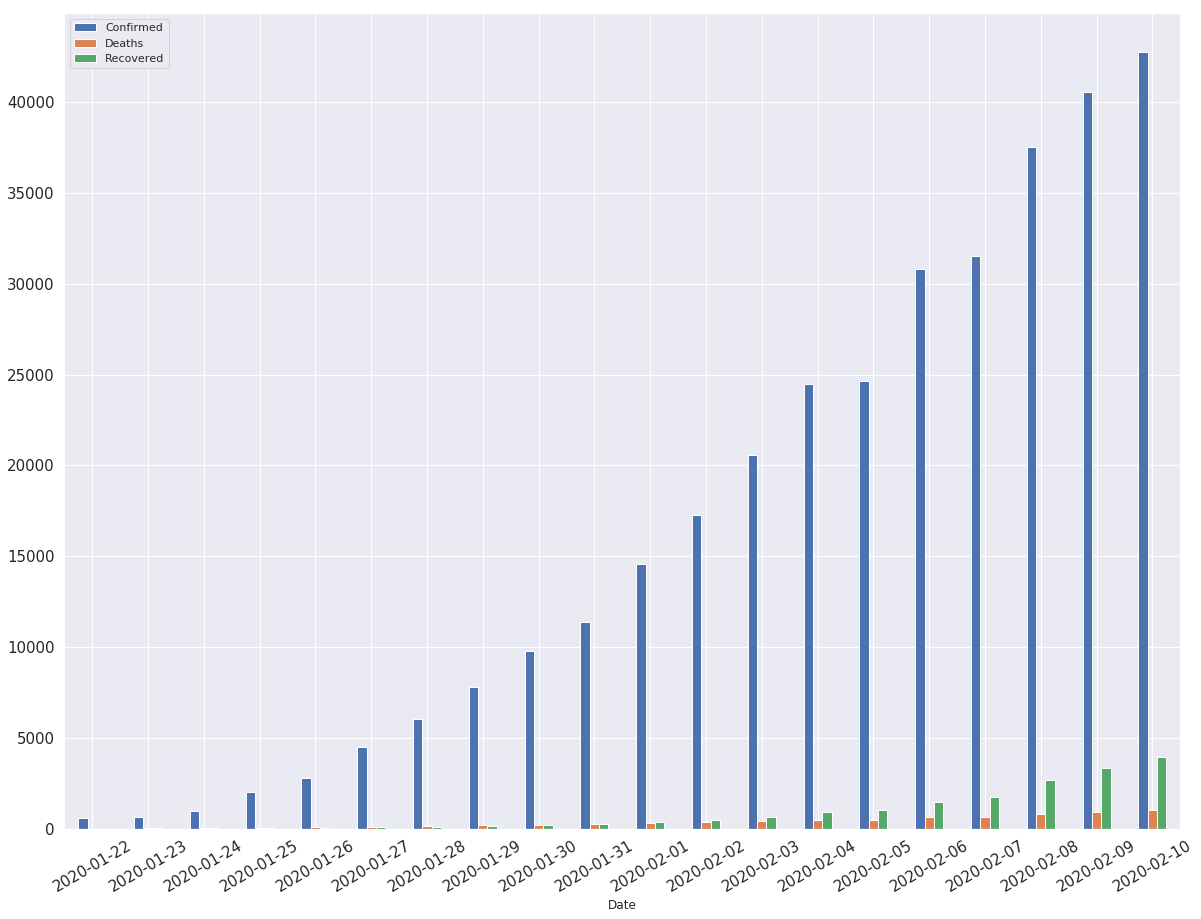

In [30]:
#*Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases
date_wise_data.plot('Date',['Confirmed', 'Deaths', 'Recovered'],kind='bar',figsize=(20,15), fontsize=15, rot=30)

<h2>**Distribution in China**</h2>

In [31]:
latest_nCoV_data

NameError: name 'latest_nCoV_data' is not defined

In [32]:
china_latest_data = latest_nCoV_data[latest_nCoV_data['Country']=='China'][['Province/State','Confirmed','Deaths','Recovered']]
#data[data.Country == 'China'][['Province/State', 'Confirmed']].groupby('Province/State').max()
# Reset Index
china_latest_data.reset_index(drop=True, inplace=True)
china_latest_data.index = pd.RangeIndex(start=1, stop=len(china_latest_data['Province/State']) + 1, step=1)

#formatted_text('***Numbers in China for Confirmed, Deaths and Recovered Cases***')

# Data Glimpse
china_latest_data

NameError: name 'latest_nCoV_data' is not defined

In [33]:
china_latest_data.plot('Province/State',['Confirmed', 'Deaths', 'Recovered'],kind='bar',figsize=(20,15), fontsize=15)

NameError: name 'china_latest_data' is not defined

**INFERENCES**

<br>Hubei is the worst affected by nCov with almost 95% of cases reported.</br>
<br>The recovery from the virus has not been that rapid. As the number of cases being reported is increasing at a very rapid rate and the virus being a new one proper medical treatment not available to treat the virus could the possible reason for the slowed down recovery. This can also be the reason for the number of deaths increasing day by day. The virus does not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

<h2>**Rest Of China (Excluding Hubei)**</h2>

In [34]:
rest_of_China = china_latest_data[china_latest_data['Province/State'] !='Hubei'][["Province/State", "Confirmed","Deaths","Recovered"]]

# Reset Index to start from 1
rest_of_China.reset_index(drop=True, inplace=True)
rest_of_China.index = pd.RangeIndex(start=1, stop=len(china_latest_data['Province/State']), step=1)

#formatted_text('***Numbers in rest of China for Confirmed, Deaths and Recovered Cases***')

# Data Glimpse
rest_of_China

NameError: name 'china_latest_data' is not defined

In [35]:
rest_of_China.plot('Province/State',['Confirmed', 'Deaths', 'Recovered'],kind='bar',figsize=(20,15), fontsize=15)

NameError: name 'rest_of_China' is not defined

In [36]:
#formatted_text('***Most number of Confirmed Cases Outside of Hubei***')
print(rest_of_China[rest_of_China['Confirmed'] > 500])

NameError: name 'rest_of_China' is not defined

<br>**INFREENCES**</br>

There have been many confirmed cases reported outside of Hubei. Zhejiang, Guangdong, Henan, Hunan beng the top four.

The recovery from the virus outside of Hubei has not been fast. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people. However the number of deaths have very minimal.

In [37]:
#Rest Of World 

In [38]:
rest_of_world = CountryWiseData[CountryWiseData['Country'] !='China'][["Country", "Confirmed","Deaths","Recovered"]]

# Reset Index
rest_of_world.reset_index(drop=True, inplace=True)
rest_of_world.index = pd.RangeIndex(start=1, stop=len(CountryWiseData['Country']), step=1)

#formatted_text('***Numbers in rest of world for Confirmed, Deaths and Recovered Cases***')

# Data Glimpse
rest_of_world

NameError: name 'CountryWiseData' is not defined

<h2>Numbers in rest of world for Confirmed, Deaths and Recovered Cases</h2>

In [39]:
#formatted_text('***Most number of Confirmed Cases Outside of China***')
print(rest_of_world[rest_of_world['Confirmed'] > 20])

NameError: name 'rest_of_world' is not defined

In [40]:
rest_of_world.plot('Country',['Confirmed', 'Deaths', 'Recovered'],kind='bar',figsize=(20,15), fontsize=15)

NameError: name 'rest_of_world' is not defined

In [41]:
data.Country.nunique()

32

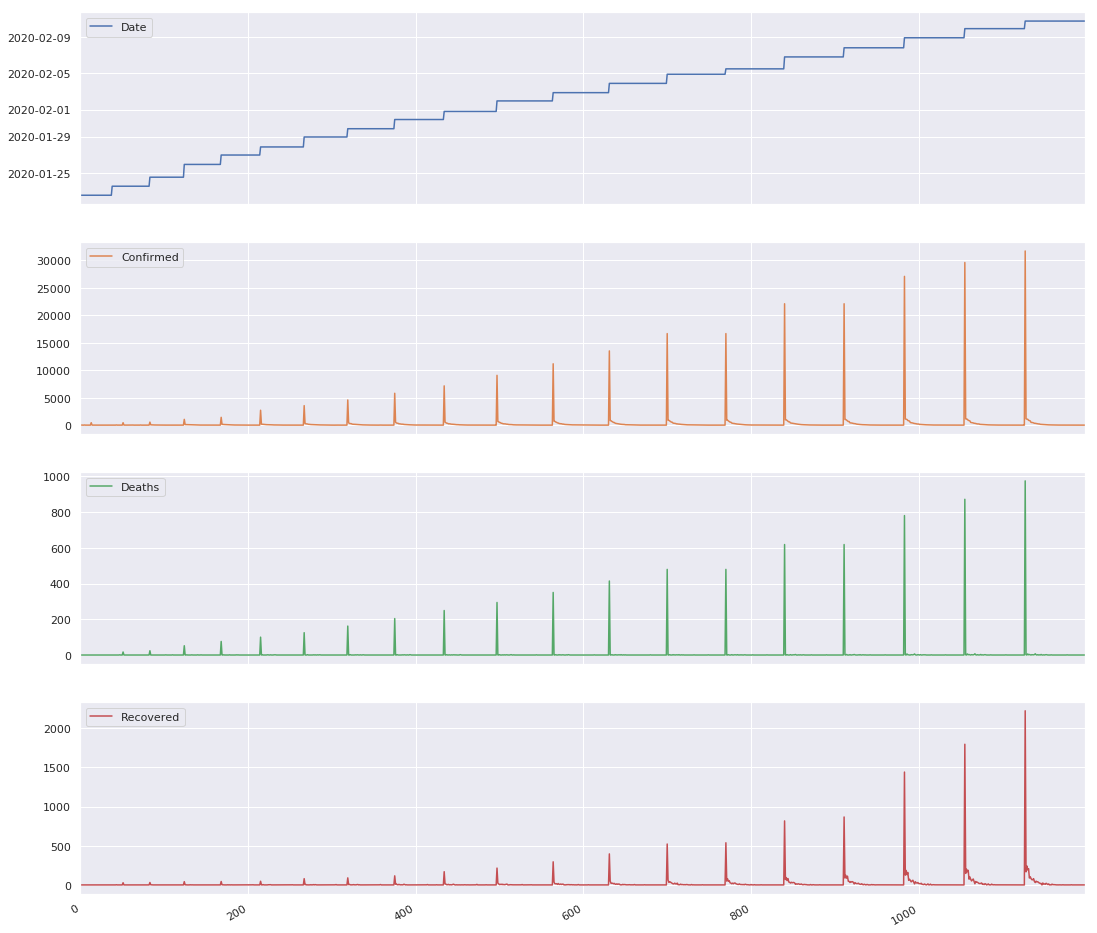

In [42]:
#Plots for the field after data cleaning 
data.plot(subplots=True,figsize=(18,18))
plt.show()

("** Countries, territories or areas with reported confirmed cases, Deaths, Recovered of 2019-nCoV, 31 January 2020**")

In [43]:

from datetime import date
data_2_feb = latest_nCoV_data[latest_nCoV_data['Date'] > pd.Timestamp(date(2020,2,2))]
data_2_feb.head()

NameError: name 'latest_nCoV_data' is not defined

In [44]:
import plotly.express as px
pxdf = px.data.gapminder()

country_isoAlpha = pxdf[['country', 'iso_alpha']].drop_duplicates()
country_isoAlpha.rename(columns = {'country':'Country'}, inplace=True)
country_isoAlpha.set_index('Country', inplace=True)
country_map = country_isoAlpha.to_dict('index')

In [45]:
def getCountryIsoAlpha(country):
    try:
        return country_map[country]['iso_alpha']
    except:
        return country
    

In [46]:
latest_nCoV_data['iso_alpha'] = latest_nCoV_data['Country'].apply(getCountryIsoAlpha)
latest_nCoV_data

NameError: name 'latest_nCoV_data' is not defined

In [47]:
data_plot = latest_nCoV_data.groupby('iso_alpha').sum().reset_index()
fig = px.choropleth(data_plot, locations="iso_alpha",
                    color="Confirmed", 
                    hover_name="iso_alpha", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

NameError: name 'latest_nCoV_data' is not defined

In [48]:
latest_nCoV_data.groupby('Country')['Confirmed'].sum()

NameError: name 'latest_nCoV_data' is not defined

In [49]:
latest_nCoV_data.groupby('Country')['Confirmed'].sum().sort_values(ascending=False)[0:10]


NameError: name 'latest_nCoV_data' is not defined

In [50]:
latest_nCoV_data.groupby('Country')['Deaths'].sum().sort_values(ascending=False)

NameError: name 'latest_nCoV_data' is not defined

In [51]:
#Initial Case time
data.sort_values(by='Date')['Date'][0]

Timestamp('2020-01-22 12:00:00')

In [52]:
#latest Case 
latest_nCoV_data['Date'].max()

NameError: name 'latest_nCoV_data' is not defined

**Which Countries States were affected the most?**

In [53]:
latest_nCoV_data[latest_nCoV_data.Country == 'China'][['Province/State', 'Confirmed']].groupby('Province/State').max()

NameError: name 'latest_nCoV_data' is not defined

**Show the no.of Persons affected with Virus**

In [54]:
latest_nCoV_data[['Confirmed', 'Deaths', 'Recovered']].max().plot(kind='bar')

NameError: name 'latest_nCoV_data' is not defined

**How many entries are being recorded per Country?**

In [55]:
plt.figure(figsize=(12,7))
chart = sns.countplot(data=latest_nCoV_data, x='Country', palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light');

NameError: name 'latest_nCoV_data' is not defined

<Figure size 864x504 with 0 Axes>

Contribution from Following Kernels

https://www.kaggle.com/ranjithks/ran-coronavirus-exploratory-data-analysis-eda
<br>https://www.kaggle.com/parulpandey/wuhan-coronavirus-a-geographical-analysis</br>